# IF3270 Machine Learning | Tugas Besar

This notebook serves as a testbed for the FFNN implementation from scratch. We will analyze the effects of various hyperparameters, including depth (number of layers), width (number of neurons per layer), activation function, learning rate, and weight initialization. Additionally, we will compare the performance of the custom FFNN model with the scikit-learn MLP.

Group Number: XX

Group Members:
- Adril Putra Merin (13522068)
- Marvin Scifo Y. Hutahean (13522110)
- Berto Richardo Togatorop (13522118)

## 1. Import Libraries

In [1]:
from ffnn import FFNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score, confusion_matrix

## 2. Import Dataset

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
y = y.astype(np.int32)

In [4]:
print(X.shape)

(70000, 784)


In [5]:
print(y.shape)

(70000,)


In [6]:
print(np.unique(y))
print(f"Number of class: {len(np.unique(y))}")

[0 1 2 3 4 5 6 7 8 9]
Number of class: 10


In [7]:
freq = [0 for i in range(10)]
for i in range(len(y)):
    freq[y[i]] += 1

for i in range(10):
    print(f"Class {i}: {freq[i]}")

Class 0: 6903
Class 1: 7877
Class 2: 6990
Class 3: 7141
Class 4: 6824
Class 5: 6313
Class 6: 6876
Class 7: 7293
Class 8: 6825
Class 9: 6958


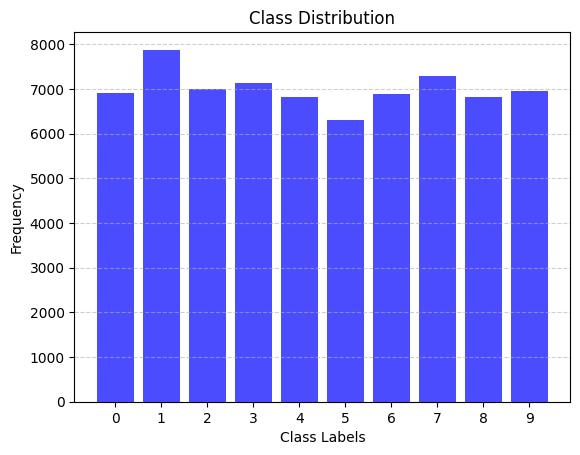

In [8]:
plt.bar(range(10), freq, color='blue', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.xticks(range(10))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Based on the graph above, the dataset is pretty balanced. Therefore, we will use micro average for the evaluation metric.

## 3. Split Training Set and Validation Set

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4. Hyperparameters Experiment

### A. Effect of Depth and Width

In this section, we explore the impact of depth and width on the FFNN’s performance. We experiment with $3\times 3 = 9$ different combinations of depth and width.

- Depth (Number of Hidden Layers): We test models with 3, 4, and 5 hidden layers to analyze how increasing the number of layers affects learning and generalization.

- Width (Number of Neurons per Layer): We vary the number of neurons per layer with values of 16, 32, and 64 to observe how the capacity of each layer influences model performance.

In [10]:
width_depth_variations = [
    [784, 16, 16, 16, 10], # depth = 3, width = 16
    [784, 32, 32, 32, 10], # depth = 3, width = 32
    [784, 64, 64, 64, 10],  # depth = 3, width = 64
    [784, 16, 16, 16, 16, 10], # depth = 4, width = 16
    [784, 32, 32, 32, 32, 10], # depth = 4, width = 32
    [784, 64, 64, 64, 64, 10], # depth = 4, width = 64
    [784, 16, 16, 16, 16, 16, 10], # depth = 5, width = 16
    [784, 32, 32, 32, 32, 32, 10], # depth = 5, width = 32
    [784, 64, 64, 64, 64, 64, 10], # depth = 5, width = 64
]

history_width_depth = {}

cnt = 0
for config in width_depth_variations:
    ffnn = FFNN(layer_sizes=config, activations=["sigmoid"]*(len(config) - 2)+["softmax"], seed=42)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0)
    history_width_depth[str(config)] = (training_loss, val_loss)
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # precision score
    precision = precision_score(y_val, preds, average="micro")
    # recall score
    recall = recall_score(y_val, preds, average="micro")
    # f1 score
    f1 = f1_score(y_val, preds, average="micro")
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    print("==================================")
    print(f"Variation-{cnt + 1} -> {config}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-1 -> [784, 16, 16, 16, 10]
Accuracy: 0.7233571428571428
Precision: 0.7233571428571428
Recall: 0.7233571428571428
F1 Score: 0.7233571428571428
Final Log Loss: 0.8444264894980167
Confusion Matrix:
[[1249    1    0    0    4   27   42   12    3    5]
 [   1 1498   15   12    0    5    1   12   50    6]
 [  89   39  937   66   35   15  133   20   37    9]
 [  50   28   81  850    2  311    6   43   38   24]
 [   7   16    2   14  866    5   29   67   22  267]
 [  87   18   13   36   13  700   51   24  157  174]
 [  19    4   36    0   60   20 1186    1   69    1]
 [  33   34    8   54   25    3    4 1186    7  149]
 [   8   94   12   47   31  127   42   13  821  162]
 [  18    7    3   49  279   19    8  179   24  834]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-2 -> [784, 32, 32, 32, 10]
Accuracy: 0.8256428571428571
Precision: 0.8256428571428571
Recall: 0.8256428571428571
F1 Score: 0.8256428571428571
Final Log Loss: 0.5762265694351749
Confusion Matrix:
[[1230    0   26    0   10   25   16    4   26    6]
 [   1 1521   10    7    1    5    5    4   42    4]
 [  33   24 1130   24   21    2   44   21   63   18]
 [  21   48   95 1023    2   45    4   26  152   17]
 [   4   10    4    0 1186    4    9   10    9   59]
 [  61    7   17  106   21  849   66   10  119   17]
 [  21   12   29    0   63   15 1225    0   19   12]
 [  20   21   27    5   21    4    0 1286    8  111]
 [   4   45   23   34   11   42   10    2 1170   16]
 [   5   30    9   25  270   18    0   73   51  939]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-3 -> [784, 64, 64, 64, 10]
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Final Log Loss: 0.5213368843121589
Confusion Matrix:
[[1253    0    7    2    2   36   15    5   20    3]
 [   1 1483    9   12    1    2    1   11   77    3]
 [  33   21 1109   19   23    4   44   16   90   21]
 [  20    6   35 1182    2   51   17   15   87   18]
 [   2    1    4    2  985    0   27    1    7  266]
 [  71    6   16   85   25  841   85    6  126   12]
 [  16    6   28    1   26   32 1276    0    9    2]
 [  17    7   12    1   17    3    1 1335   20   90]
 [  11    7   13   16   13   30   36    4 1202   25]
 [  12    6    4   12   33   11    0   66   42 1234]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-4 -> [784, 16, 16, 16, 16, 10]
Accuracy: 0.5280714285714285
Precision: 0.5280714285714285
Recall: 0.5280714285714285
F1 Score: 0.5280714285714285
Final Log Loss: 1.352920103660619
Confusion Matrix:
[[ 969    0  134    2    2  196   38    0    2    0]
 [   7 1427    1   30    1    7    1   81   36    9]
 [ 182   10  526   51   41  236  268   13   44    9]
 [ 427  497    3  222    7   99   32   74   43   29]
 [   1    0    8    0 1026    1   72    9    0  178]
 [ 361   32   86   68   24  422  188   26   62    4]
 [   6    2  149    0   41   49 1123    6   16    4]
 [  46   74    4   19  171   32   65  759   41  292]
 [ 102   35   75  127   31  197  207  104  473    6]
 [   7   15    6    3  701   10   56  172    4  446]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-5 -> [784, 32, 32, 32, 32, 10]
Accuracy: 0.6723571428571429
Precision: 0.6723571428571429
Recall: 0.6723571428571429
F1 Score: 0.6723571428571429
Final Log Loss: 0.9954127723806346
Confusion Matrix:
[[1253    0    0   14    4   49   17    2    4    0]
 [   5 1423   28   32    3    0    0    4  103    2]
 [ 167  180  365   61   82    3  275   26  221    0]
 [  58   68    3  995    4    5    6   23  251   20]
 [   6    2    1    2  907    3   34   50   28  262]
 [ 372    8    4  334   13  303   80    7  136   16]
 [  66    1  100    1   38    1 1172    0   17    0]
 [  10   45    4   73   53   11    1 1182   17  107]
 [  37   23   10  141   10   28   44    3  989   72]
 [  13    6    1   57  247   22    6  226   18  824]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-6 -> [784, 64, 64, 64, 64, 10]
Accuracy: 0.8346428571428571
Precision: 0.8346428571428571
Recall: 0.8346428571428571
F1 Score: 0.8346428571428571
Final Log Loss: 0.5556371409520559
Confusion Matrix:
[[1276    0   12    0    3   32    5    2    9    4]
 [   0 1524   32    6    1    7    1    2   21    6]
 [  30   11 1180   18   25    7   47   29   30    3]
 [  15   10   80 1187    2   38   10   27   41   23]
 [  10   10   11    0 1080    0   27   21    9  127]
 [  70   23   54  101    6  834   59    9   85   32]
 [  23    4   97    1   22   11 1233    2    2    1]
 [  21   10   35    5    9    5    0 1361   21   36]
 [   9   27  156   26    6   63   20    5  965   80]
 [  17   11    5   15  108   13    0  155   51 1045]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-7 -> [784, 16, 16, 16, 16, 16, 10]
Accuracy: 0.2897857142857143
Precision: 0.2897857142857143
Recall: 0.2897857142857143
F1 Score: 0.2897857142857143
Final Log Loss: 1.8223013978936817
Confusion Matrix:
[[1091   37    0    0    0    0    0  215    0    0]
 [  19 1568    0    0    0    0    0   13    0    0]
 [ 680  507    0    0    0    0    0  193    0    0]
 [ 523  779    0    0    0    0    0  131    0    0]
 [  17    9    0    0    0    0    0 1269    0    0]
 [ 698  199    0    0    0    0    0  376    0    0]
 [ 780  120    0    0    0    0    0  496    0    0]
 [  39   66    0    0    0    0    0 1398    0    0]
 [ 738  360    0    0    0    0    0  259    0    0]
 [  43   28    0    0    0    0    0 1349    0    0]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-8 -> [784, 32, 32, 32, 32, 32, 10]
Accuracy: 0.5762142857142857
Precision: 0.5762142857142857
Recall: 0.5762142857142857
F1 Score: 0.5762142857142857
Final Log Loss: 1.2236317429116197
Confusion Matrix:
[[1223    1    2    0    6   14   94    1    2    0]
 [   0 1446    0   49    0    4    2   75   23    1]
 [ 115   60   64  355   33  198  251   50  244   10]
 [  23  102    2  846    3  185   12   50  197   13]
 [   6    0    0    0  991    0   52  139    7  100]
 [ 185   13   12  107   23  506  292    9  124    2]
 [ 163    7   26    9  109   75  916    7   81    3]
 [   5   37    1    3  224    1   77 1090    8   57]
 [  15  100   12   84   14  111  117   79  801   24]
 [   6   16    0    3  649    2   51  478   31  184]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-9 -> [784, 64, 64, 64, 64, 64, 10]
Accuracy: 0.7857142857142857
Precision: 0.7857142857142857
Recall: 0.7857142857142857
F1 Score: 0.7857142857142857
Final Log Loss: 0.6529871094270207
Confusion Matrix:
[[1251    0    9    1    4   38   21    8    7    4]
 [   2 1519   12   16    1   11    2    4   31    2]
 [  66   36 1044   55   31   19   68   19   32   10]
 [  14   48   69 1069    2   92    6   21   92   20]
 [   5   25    8    1 1041    2   31   18   14  150]
 [  57   29   10   78   23  837   51    4  165   19]
 [  23   34   64    0   27   30 1206    0   12    0]
 [  13   13   25   35   19   15    1 1257   33   92]
 [   5   49    9   66   20   99   21    0 1054   34]
 [   4   12   12   19  367   25    1  133  125  722]]


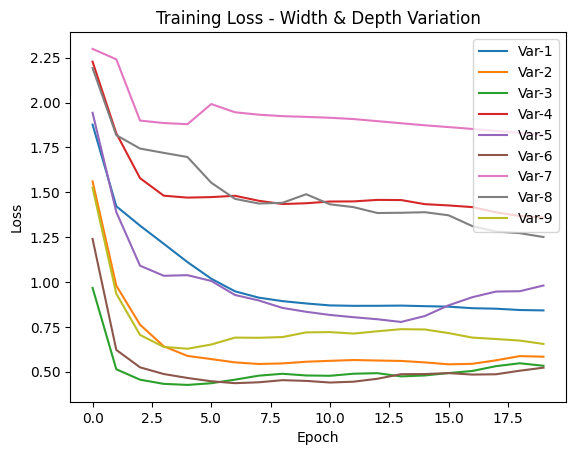

In [11]:
# Training Loss Plot
cnt = 0
for config, (train_loss, val_loss) in history_width_depth.items():
    plt.plot(train_loss, label=f"Var-{cnt + 1}")
    cnt += 1
plt.legend()
plt.title("Training Loss - Width & Depth Variation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

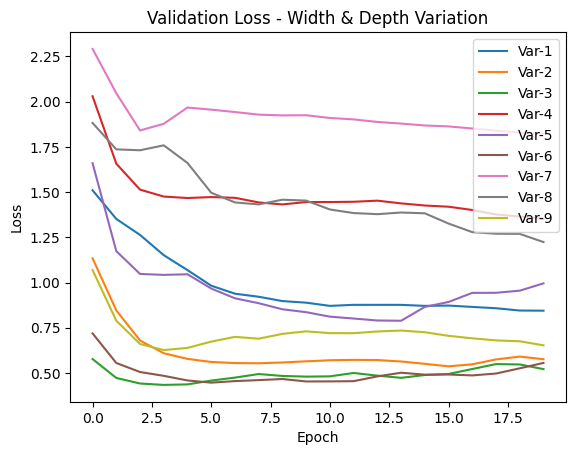

In [12]:
# Validation Loss Plot
cnt = 0
for config, (train_loss, val_loss) in history_width_depth.items():
    plt.plot(val_loss, label=f"Var-{cnt + 1}")
    cnt += 1
plt.legend()
plt.title("Validation Loss - Width & Depth Variation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

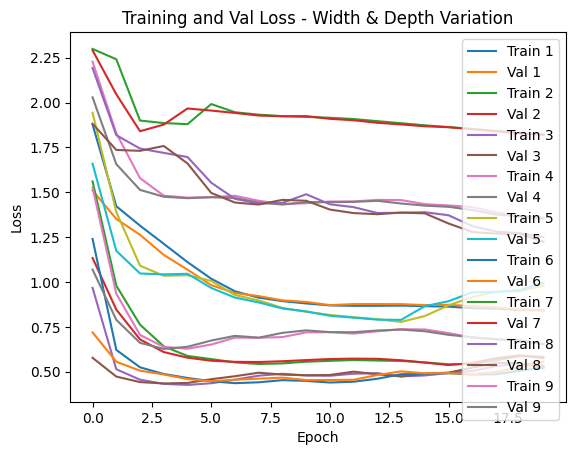

In [13]:
# Training and Validation Loss Plot
cnt = 0
for config, (train_loss, val_loss) in history_width_depth.items():
    plt.plot(train_loss, label=f"Train {cnt + 1}")
    plt.plot(val_loss, label=f"Val {cnt + 1}")
    cnt += 1
plt.legend()
plt.title("Training and Val Loss - Width & Depth Variation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### B. Effect of Activation Function on Hidden Layers

In this section, we explore the impact of the activation function used in the hidden layers on the FFNN’s performance. We experiment with four different activation functions:
- Linear
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh (Hyperbolic Tangent)

In [10]:
activation_func_variations = ["linear", "relu", "sigmoid", "tanh", "swish", "elu"]

history_activation = {}

cnt = 0
for act in activation_func_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=[act]*3+["softmax"], seed=42)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0)
    history_activation[act] = (training_loss, val_loss)
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # precision score
    precision = precision_score(y_val, preds, average="micro")
    # recall score
    recall = recall_score(y_val, preds, average="micro")
    # f1 score
    f1 = f1_score(y_val, preds, average="micro")
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Activation Function: {act}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Activation Function: linear
Accuracy: 0.10142857142857142
Precision: 0.10142857142857142
Recall: 0.10142857142857142
F1 Score: 0.10142857142857142
Final Log Loss: 32.387797116792406
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0 1343]
 [   0    0    0    0    0    0    0    0    0 1600]
 [   0    0    0    0    0    0    0    0    0 1380]
 [   0    0    0    0    0    0    0    0    0 1433]
 [   0    0    0    0    0    0    1    1    0 1293]
 [   0    0    0    0    0    0    0    0    0 1273]
 [   0    0    0    0    0    0    0    0    0 1396]
 [   0    0    0    0    0    0    0    0    0 1503]
 [   0    0    0    0    0    0    0    0    0 1357]
 [   0    0    0    0    0    0    0    0    0 1420]]
Variation-2 -> Activation Function: relu
Accuracy: 0.09692857142857143
Precision: 0.09692857142857143
Recall: 0.09692857142857143
F1 Score: 0.09692857142857143
Final Log Loss: 32.54999355704343
Confusion Matrix:
[[   0    0    0    0    0    0    0    0 

d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-3 -> Activation Function: sigmoid
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Final Log Loss: 0.5213368843121589
Confusion Matrix:
[[1253    0    7    2    2   36   15    5   20    3]
 [   1 1483    9   12    1    2    1   11   77    3]
 [  33   21 1109   19   23    4   44   16   90   21]
 [  20    6   35 1182    2   51   17   15   87   18]
 [   2    1    4    2  985    0   27    1    7  266]
 [  71    6   16   85   25  841   85    6  126   12]
 [  16    6   28    1   26   32 1276    0    9    2]
 [  17    7   12    1   17    3    1 1335   20   90]
 [  11    7   13   16   13   30   36    4 1202   25]
 [  12    6    4   12   33   11    0   66   42 1234]]
Variation-4 -> Activation Function: tanh
Accuracy: 0.9327142857142857
Precision: 0.9327142857142857
Recall: 0.9327142857142857
F1 Score: 0.9327142857142857
Final Log Loss: 0.2294476127217782
Confusion Matrix:
[[1297    1    8    4    3    7   17    1    3    2]
 [   0 1561    8    8    1    2    1    4   10    5

d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:41: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-5 -> Activation Function: swish
Accuracy: 0.11428571428571428
Precision: 0.11428571428571428
Recall: 0.11428571428571428
F1 Score: 0.11428571428571428
Final Log Loss: 31.924378716075186
Confusion Matrix:
[[   0 1343    0    0    0    0    0    0    0    0]
 [   0 1600    0    0    0    0    0    0    0    0]
 [   0 1380    0    0    0    0    0    0    0    0]
 [   0 1433    0    0    0    0    0    0    0    0]
 [   0 1295    0    0    0    0    0    0    0    0]
 [   0 1273    0    0    0    0    0    0    0    0]
 [   0 1396    0    0    0    0    0    0    0    0]
 [   0 1503    0    0    0    0    0    0    0    0]
 [   0 1357    0    0    0    0    0    0    0    0]
 [   0 1420    0    0    0    0    0    0    0    0]]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:51: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, x, alpha * (np.exp(x) - 1))
d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:49: RuntimeWarning: overflow encountered in exp
  turunan = np.where(x >= 0, 1, alpha * np.exp(x))


Variation-6 -> Activation Function: elu
Accuracy: 0.09971428571428571
Precision: 0.09971428571428571
Recall: 0.09971428571428571
F1 Score: 0.09971428571428571
Final Log Loss: 32.44958623688804
Confusion Matrix:
[[   0    0    0    0    0    0 1343    0    0    0]
 [   0    0    0    0    0    0 1600    0    0    0]
 [   0    0    0    0    0    0 1380    0    0    0]
 [   0    0    0    0    0    0 1433    0    0    0]
 [   0    0    0    0    0    0 1295    0    0    0]
 [   0    0    0    0    0    0 1273    0    0    0]
 [   0    0    0    0    0    0 1396    0    0    0]
 [   0    0    0    0    0    0 1503    0    0    0]
 [   0    0    0    0    0    0 1357    0    0    0]
 [   0    0    0    0    0    0 1420    0    0    0]]


### C. Effect of Learning Rate

In this section, we explore the impact of learning rate on the FFNN's overall performance. We experiment with three different learning rates:
- 0.001
- 0.01
- 0.1

In [17]:
learning_rate_variations = [0.001, 0.01, 0.1]

history_learning_rate = {}

cnt = 0
for learning_rate in learning_rate_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=learning_rate, epochs=20, batch_size=64, verbose=0)
    history_learning_rate[learning_rate] = (training_loss, val_loss)
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # precision score
    precision = precision_score(y_val, preds, average="micro")
    # recall score
    recall = recall_score(y_val, preds, average="micro")
    # f1 score
    f1 = f1_score(y_val, preds, average="micro")
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Learning Rate: {learning_rate}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Learning Rate: 0.001
Accuracy: 0.8973571428571429
Precision: 0.8973571428571429
Recall: 0.8973571428571429
F1 Score: 0.8973571428571429
Final Log Loss: 0.35092456374008557
Confusion Matrix:
[[1289    0    4    1    2   10   16    5   12    4]
 [   0 1543    5   15    2    9    0    5   17    4]
 [  12   15 1192   24   26    6   23   31   45    6]
 [   4    8   29 1247    1   62   10   20   35   17]
 [   3    4   12    2 1161    6   15    4    6   82]
 [  21   14   10   66   24 1053   26    6   47    6]
 [  13   10   19    4   24   19 1294    0   11    2]
 [   8   11   23    9   13    4    0 1387    7   41]
 [  11   21   19   35    9   43   17    4 1175   23]
 [   6    9   12   22   63   11    2   52   21 1222]]
Variation-2 -> Learning Rate: 0.01
Accuracy: 0.9100714285714285
Precision: 0.9100714285714285
Recall: 0.9100714285714285
F1 Score: 0.9100714285714285
Final Log Loss: 0.2910100013258417
Confusion Matrix:
[[1283    0    6    1    6   12   11    9   13    2]
 [   0 1

### D. Effect of Weight Initialization

In this section, we explore the impact of weight initialization on the FFNN's overall performance. We experiment with three different learning rates:
- Zero Initialization
- Uniform Distribution
- Normal Distribution

In [11]:
weight_init_variations = ["xavier"]

history_weight_init = {}

cnt = 0
for weight_init in weight_init_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42, weight_init=weight_init, use_rmsnorm=True)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0)
    history_weight_init[weight_init] = (training_loss, val_loss)
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # precision score
    precision = precision_score(y_val, preds, average="micro")
    # recall score
    recall = recall_score(y_val, preds, average="micro")
    # f1 score
    f1 = f1_score(y_val, preds, average="micro")
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Weight Init: {weight_init}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Weight Init: xavier
Accuracy: 0.9741428571428571
Precision: 0.9741428571428571
Recall: 0.9741428571428571
F1 Score: 0.9741428571428571
Final Log Loss: 0.09142976457045245
Confusion Matrix:
[[1315    1    5    0    1    4    4    3    6    4]
 [   0 1586    1    3    2    0    0    5    2    1]
 [   2    9 1329    6    2    4    8    9    9    2]
 [   2    1    9 1384    1   15    0    6    7    8]
 [   1    0    2    1 1269    1    3    5    2   11]
 [   2    0    1   11    3 1241    9    2    3    1]
 [   6    2    0    0    3    6 1371    2    6    0]
 [   1    3   10    1    3    2    0 1471    1   11]
 [   2    3    8   10    1    7    5    7 1309    5]
 [   3    1    2    7   13    5    1   13   12 1363]]


## 5. Comparison With MLPClassifier

In this part, we will compare the custom FFNN with sklearn MPLClassifier with the following hyperparameter:
- Activation function: tanh
- xxx

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 64, 64),
                    activation="tanh",
                    learning_rate_init=0.1,
                    learning_rate='constant',
                    max_iter=5,
                    solver="adam",
                    batch_size=64,
                    random_state=42)
mlp.fit(X_train, y_train)
pred_classes_mlp = mlp.predict(X_val)
acc_mlp = accuracy_score(y_val, pred_classes_mlp)
print(acc_mlp)

0.11428571428571428


c:\Users\adril\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
